In [169]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [170]:
df = pd.read_csv('Placement_Data_Full_Class.csv',index_col=0)

In [171]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [172]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [173]:
df['salary'] = df['salary'].fillna(0)

In [174]:
placed = df[df['status'] == 'Placed']

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [94]:
# df[(df['status'] != 'Placed') & (df['salary'] == 0)]
# all null values in salary column are all Unplaced students.

### categorical
1. gender
2. ssc_b
3. hsc_b
4. hsc_s
5. degree_t
6. workex
7. specialization
8. status

## Getting Salary Ranges

In [86]:
degree_t = df['degree_t'].unique()
mins = []
maxs = []
avgs = []
for i in degree_t:
    mins.append(min(df[(df['salary'] > 0) & (df['degree_t'] == i)]['salary']))
    maxs.append(max(df[(df['salary'] > 0) & (df['degree_t'] == i)]['salary']))
    avgs.append((df[(df['salary'] > 0) & (df['degree_t'] == i)]['salary']).mean())
#min(df[(df['salary'] > 0) & (df['degree_t'] == 'Comm&Mgmt')]['salary'])
#max(df[(df['salary'] > 0) & (df['degree_t'] == 'Comm&Mgmt')]['salary'])

In [115]:
temp = placed.groupby(['degree_t','specialisation']).agg({'salary': ['min','max','mean']})

In [182]:
#temp[ temp.index == ('Comm&Mgmt', 'Mkt&Fin')]
#temp[temp.index.names['degree_t'] == 'Comm&Mgmt']
temp.index.names

FrozenList(['degree_t', 'specialisation'])

In [123]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [124]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [168]:
df.groupby('ssc_b').count()['status']

ssc_b
Central    116
Others      99
Name: status, dtype: int64

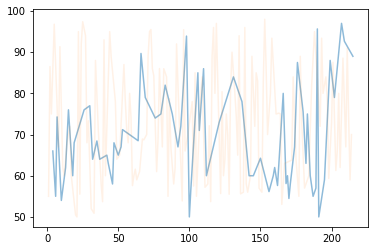

In [166]:
plt.plot(df[df['status'] == 'Not Placed']['etest_p'], alpha = 0.5) 
plt.plot(df[df['status'] == 'Placed']['etest_p'], alpha=0.1) 
plt.show()

In [146]:
df[df['status'] == 'Not Placed']['ssc_p'].describe()

count    67.000000
mean     57.544030
std       8.394246
min      40.890000
25%      52.000000
50%      56.280000
75%      63.000000
max      77.800000
Name: ssc_p, dtype: float64

In [147]:
df[df['status'] == 'Not Placed']['hsc_p'].describe()

count    67.000000
mean     58.395522
std       9.914090
min      37.000000
25%      51.000000
50%      60.330000
75%      64.000000
max      82.000000
Name: hsc_p, dtype: float64

In [132]:
# 148 count
# 49.0 min
# 71.7214 
# 89.4

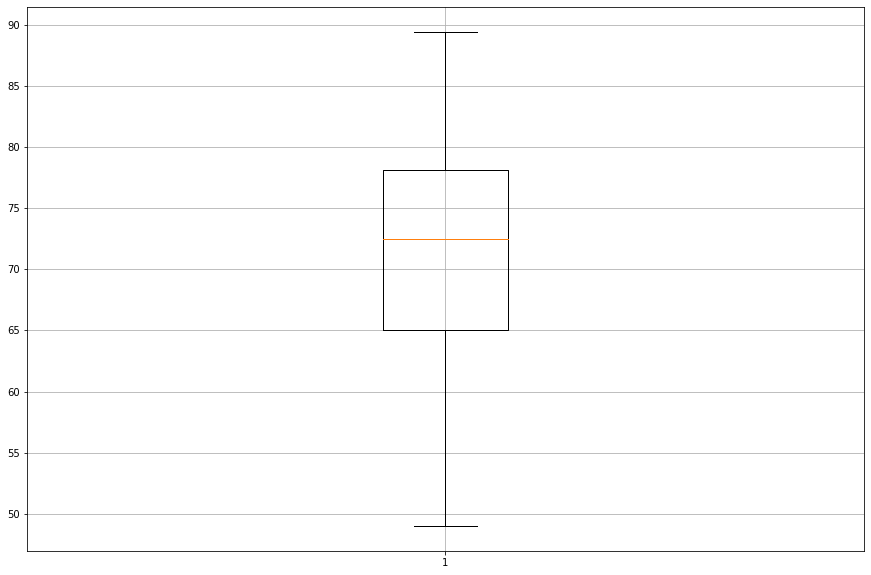

In [140]:
plt.figure(figsize=(15,10))
plt.boxplot(df[df['status'] == 'Placed']['ssc_p'])
plt.grid()
plt.show()

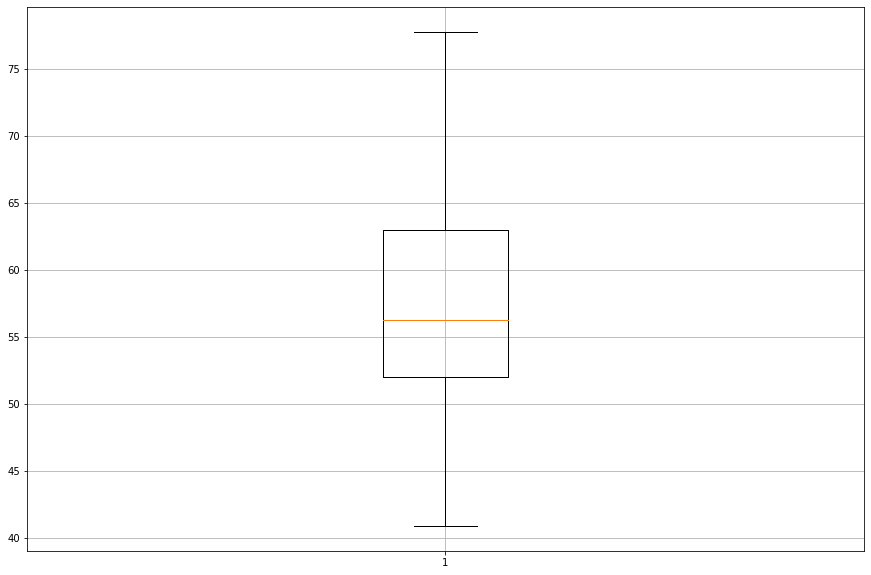

In [141]:
plt.figure(figsize=(15,10))
plt.boxplot(df[df['status'] == 'Not Placed']['ssc_p'])
plt.grid()
plt.show()

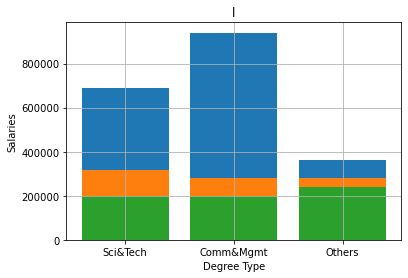

In [186]:
plt.bar(degree_t,maxs)
plt.bar(degree_t,avgs)
plt.bar(degree_t,mins)

plt.xlabel('Degree Type')
plt.ylabel('Salaries')
plt.title('l')
plt.grid()
plt.show()